In [1]:
%matplotlib inline
import os
import sys
sys.path.append("..")
import time
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 10
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times New Roman']

from canon.pattern.model import GMModel, KMeansModel, BGMModel, MeanShiftModel

Using TensorFlow backend.


Silhouette Score = 0.39801843406065496, Calinski-Harabaz Score = 1766.4863501771672


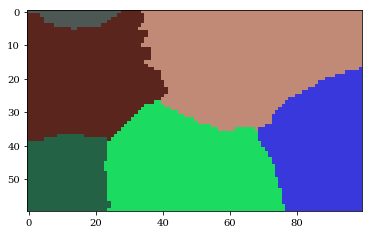

In [2]:
feature_file = "BTO_25C_wb3_processed"
img_shape = (60, 100)

features = np.load("features/" + feature_file + ".npy")

model = BGMModel()
model.train(features, n_clusters=6, preprocessors=[])

silhouette = model.compute_silhouette_score(features)
calinski = model.compute_calinski_harabaz_score(features)
print("Silhouette Score = {}, Calinski-Harabaz Score = {}".format(silhouette, calinski))

scores = np.array(model.score(features))
Z = model.coloring(scores.reshape(img_shape))

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.imshow(Z[::-1, :, :], aspect=1)
fig.savefig("img/Z.pdf", bbox_inches='tight', figsize=(5, 4), dpi=300)